# Project Requirements
The project will include the following tasks:

* **Python Programming Structures**: Demonstrate the use of Python-specific structures such as list comprehensions.
* **Data Structures and their Properties**: Utilize Pandas as the primary data structure to manage and manipulate your dataset.
* **Reading and Writing Data**: Import and export data effectively using Python.
* **Handling Missing Data and Duplicates**: Perform data cleaning by managing missing data and duplicates as necessary.
* **Descriptive Statistics**: Compute basic descriptive statistics to summarize and understand your dataset.
* **Organized Data Analysis**:
  - Analyze each variable individually.
  - Proceed to analyze pairs of variables by starting with tables and graphs to explore relationships.
  - Perform statistical tests on variable pairs to investigate potential relationships.
* **Data Visualization with Matplotlib**: Visualize your data using Matplotlib or Pandas' graphing functions.
* **Frequency/Count Tables and Percentages**: Generate tables using frequencies, counts, and percentages, ensuring to include the total sample size ( n).
* **Principles of Visual Analytics**: Apply visual analytics techniques using frequencies, counts, and percentages.
* **Customizing Graphs**: Customize graphs to enhance clarity and visual appeal beyond default settings.
* **Exploratory Data Analysis (EDA)**: Conduct exploratory data analysis, including variable selection, indexing, grouping, and transforming the data.
* **Analysis of Variable Types**: Perform analyses on categorical variables, numerical variables, and pairs of variables.

# 1. Initial Preparation
Understand the data thoroughly. Aim to grasp each variable fully. If possible, investigate the story behind the data, including why and how it was collected and what it is intended to study.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency

###**1.1. Load the data**
Use commands like head(), isnull().sum().

In [2]:
# Load the data
df = pd.read_excel('https://raw.githubusercontent.com/hiephamk/Data_Group_Project/main/WorkPlaceSatisfactionSurveyData.xlsx')

In [3]:
# Display the first 10 rows of the data
df.head(10)

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare,holidayCabin,gym,muscleCare
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN
5,6,2,31,2,2.0,14.0,1910,4,4.0,5,2,4,1.0,1.0,NaN,NaN
6,7,1,49,1,2.0,16.0,2066,3,5.0,4,2,2,NaN,NaN,1.0,NaN
7,8,1,55,1,1.0,0.0,2066,3,5.0,3,1,3,1.0,NaN,NaN,NaN
8,9,1,40,2,1.0,23.0,2768,2,4.0,4,2,4,NaN,1.0,NaN,NaN
9,10,1,33,1,1.0,16.0,2106,3,2.0,1,1,1,1.0,NaN,NaN,NaN


In [4]:
# Check for missing values
df.isnull().sum()

,0
number,0
gender,0
age,0
family,0
education,1
years_of_service,2
salary,0
sat_management,0
sat_colleques,1
sat_workingEnvironment,0


We check for missing values in each column. Identifying missing data early helps decide how to clean the dataset before analysis.

###**1.2. Adjust column names and remove unnecessary columns**
- Example: columns(['name1', 'name2'])
- Drop unnecessary columns or rows as needed using drop().

In [5]:
# List all column names
column_name = df.columns.tolist()

In [6]:
print(column_name)

['number', 'gender', 'age', 'family', 'education', 'years_of_service', 'salary', 'sat_management', 'sat_colleques', 'sat_workingEnvironment', 'sat_salary', 'sat_tasks', 'healtcare', 'holidayCabin', 'gym', 'muscleCare']


In [7]:
# Rename the columns to correct any typos or make them more readable
df.rename(columns={
    'healtcare': 'healthcare',
    'sat_colleques': 'sat_colleagues',
    'sat_workingEnvironment': 'sat_working_environment'
}, inplace=True)

# Verify the changes
print(df.columns)


Index(['number', 'gender', 'age', 'family', 'education', 'years_of_service',
       'salary', 'sat_management', 'sat_colleagues', 'sat_working_environment',
       'sat_salary', 'sat_tasks', 'healthcare', 'holidayCabin', 'gym',
       'muscleCare'],
      dtype='object')


This ensures that the column names are accurate and easy to work with for the remaining steps of the analysis.


In [8]:
# Drop unnecessary columns, but first check if they exist
columns_to_drop = ["number", "gym", "muscleCare", "holidayCabin", "healtcare"]

# Check which columns exist in the DataFrame
existing_columns = [col for col in columns_to_drop if col in df.columns]

# Drop only the existing columns
df = df.drop(existing_columns, axis=1)

We list all column names and remove unnecessary columns like "gym" or "holidayCabin". Checking if columns exist before dropping ensures no errors occur

### **1.3. Get summary statistics**
* Use commands like info(), describe(), count(), nlargest().
* Loop through variables to explore unique values: for var in df: print(var, df[var].unique())



In [9]:
# Get summary information about the dataset
print("Summary Information:")
df.info()

Summary Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   82 non-null     int64  
 1   age                      82 non-null     int64  
 2   family                   82 non-null     int64  
 3   education                81 non-null     float64
 4   years_of_service         80 non-null     float64
 5   salary                   82 non-null     int64  
 6   sat_management           82 non-null     int64  
 7   sat_colleagues           81 non-null     float64
 8   sat_working_environment  82 non-null     int64  
 9   sat_salary               82 non-null     int64  
 10  sat_tasks                82 non-null     int64  
 11  healthcare               47 non-null     float64
dtypes: float64(4), int64(8)
memory usage: 7.8 KB


The df.info() method provides details about the dataset, such as the data types and whether there are any missing values.

In [10]:
# Get descriptive statistics of the dataset
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
          gender        age     family  education  years_of_service  \
count  82.000000  82.000000  82.000000  81.000000         80.000000   
mean    1.231707  37.951220   1.621951   1.987654         12.175000   
std     0.424519   9.773866   0.487884   0.844006          8.807038   
min     1.000000  20.000000   1.000000   1.000000          0.000000   
25%     1.000000  31.000000   1.000000   1.000000          3.750000   
50%     1.000000  37.500000   2.000000   2.000000         12.500000   
75%     1.000000  44.000000   2.000000   3.000000         18.250000   
max     2.000000  61.000000   2.000000   4.000000         36.000000   

            salary  sat_management  sat_colleagues  sat_working_environment  \
count    82.000000       82.000000       81.000000                82.000000   
mean   2563.878049        3.060976        4.061728                 3.219512   
std     849.350302        1.058155        0.826826                 1.154961   
min    1521.000000 

The df.describe() method gives a statistical summary of numerical columns, such as the mean, minimum, and maximum values.

In [11]:
print("\nCount of non-null values in each column:")
print(df.count())


Count of non-null values in each column:
gender                     82
age                        82
family                     82
education                  81
years_of_service           80
salary                     82
sat_management             82
sat_colleagues             81
sat_working_environment    82
sat_salary                 82
sat_tasks                  82
healthcare                 47
dtype: int64


In [12]:
print("\n5 Largest salaries:")
print(df['salary'].nlargest(5))


5 Largest salaries:
32    6278
16    5225
66    5069
21    4874
23    4446
Name: salary, dtype: int64


In [13]:
print("\nUnique values for each column:")
for var in df.columns:
    print(f"{var}: {df[var].unique()}")


Unique values for each column:
gender: [1 2]
age: [38 29 30 36 24 31 49 55 40 33 39 35 58 53 42 26 47 44 43 56 21 45 59 37
 28 50 32 51 22 34 27 41 25 61 20 52 46]
family: [1 2]
education: [ 1.  2.  3.  4. nan]
years_of_service: [22. 10.  7. 14.  4. 16.  0. 23. 21. 15. 12.  2. 17. 20. 13. 27.  1.  3.
 nan 24.  5.  9.  6. 35. 28. 18. 36. 19.  8.]
salary: [3587 2963 1989 2144 2183 1910 2066 2768 2106 2651 2846 2808 3393 2691
 5225 2729 2925 2457 4874 3510 4446 1521 2223 1949 2340 6278 1559 2027
 2300 2534 1872 2261 2417 3119 2574 1715 5069 2495 3470 1598 1638 2612]
sat_management: [3 1 2 4 5]
sat_colleagues: [ 3.  5.  4.  2. nan]
sat_working_environment: [3 2 1 5 4]
sat_salary: [3 1 2 4 5]
sat_tasks: [3 2 4 1 5]
healthcare: [nan  1.]


###**1.4. Data cleaning**
Clean the data by handling missing values and other issues

In [14]:
# Fill missing values with 0
df2 = df.fillna(0)

In [15]:
# Check for missing values after cleaning
print("\nMissing values after cleaning:")
print(df2.isnull().sum())


Missing values after cleaning:
gender                     0
age                        0
family                     0
education                  0
years_of_service           0
salary                     0
sat_management             0
sat_colleagues             0
sat_working_environment    0
sat_salary                 0
sat_tasks                  0
healthcare                 0
dtype: int64


Missing values are filled with 0 to avoid errors during analysis. We then check to confirm that no missing values remain.

# 2. Examine Variable Distributions

###**2.1. Identify variable types**
  - Categorical/Qualitative
  - Numerical/Quantitative

In [16]:
# Categorical variables
categorical_vars = ['gender','family', 'education', 'sat_management', 'sat_colleagues', 'sat_working_environment']
# Numerical variables
numerical_vars = ['age', 'salary', 'years_of_service']

We categorize the variables into two types: categorical and numerical. This helps in choosing the correct analysis and visualization methods later.

In [17]:
# Print categorical variables statistics
print("Descriptive Statistics for Categorical Variables:")
df[categorical_vars].describe()

Descriptive Statistics for Categorical Variables:


,gender,family,education,sat_management,sat_colleagues,sat_working_environment
count,82.000000,82.000000,81.000000,82.000000,81.000000,82.000000
mean,1.231707,1.621951,1.987654,3.060976,4.061728,3.219512
std,0.424519,0.487884,0.844006,1.058155,0.826826,1.154961
min,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,4.000000,3.000000
50%,1.000000,2.000000,2.000000,3.000000,4.000000,3.000000
75%,1.000000,2.000000,3.000000,4.000000,5.000000,4.000000
max,2.000000,2.000000,4.000000,5.000000,5.000000,5.000000


###**2.2. Data analyzing**
  - Recall insights from describe().
  - Review means, standard deviations, and other descriptive statistics.

In [18]:
# Recall describe() results for numerical variables
print("Descriptive Statistics for Numerical Variables:")
df[numerical_vars].describe()

Descriptive Statistics for Numerical Variables:


,age,salary,years_of_service
count,82.000000,82.000000,80.000000
mean,37.951220,2563.878049,12.175000
std,9.773866,849.350302,8.807038
min,20.000000,1521.000000,0.000000
25%,31.000000,2027.000000,3.750000
50%,37.500000,2320.000000,12.500000
75%,44.000000,2808.000000,18.250000
max,61.000000,6278.000000,36.000000


These statistics provide a strong overview of the distribution and range of the data. The broad spread in age, salary, and years of service suggests a diverse workforce in terms of experience and compensation, which could impact workplace satisfaction and other variables.

###**2.3. Visualizations**
- Bar charts for categorical variables
- Histograms for numerical variables
- Boxplots, line plots, area charts, pie charts, scatter plots, etc.

####**2.3.1. Bar chart for categorical variable 'Gender'**

<ipython-input-19-8e2d638ca9c7>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace({1: 'Woman', 2: 'Man'}, inplace=True)


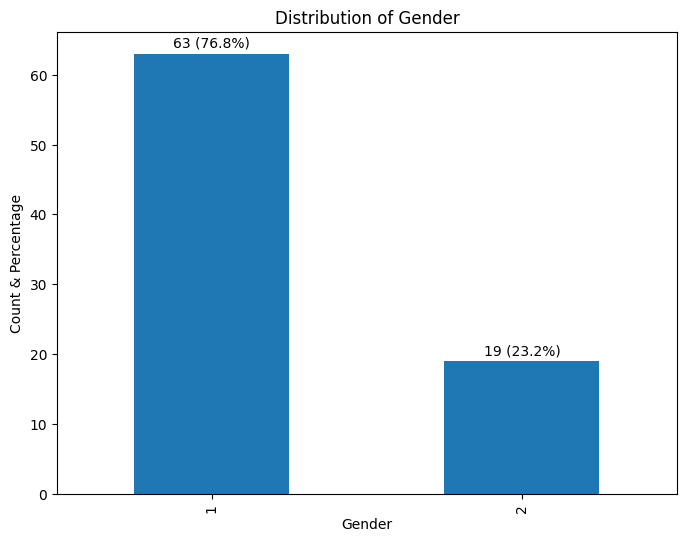

In [19]:
# Bar chart for categorical variable 'gender'
plt.figure(figsize=(8, 6))
df['gender'].value_counts().plot(kind='bar')
df['gender'].replace({1: 'Woman', 2: 'Man'}, inplace=True)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count & Percentage')

# Add value labels on top of the bars
gender_counts = df['gender'].value_counts()
total = gender_counts.sum()
for i, v in enumerate(gender_counts.values):
    percentage = (v / total) * 100
    plt.text(i, v + 0.5, f'{v} ({percentage:.1f}%)', ha='center', va='bottom')

plt.show()

A bar chart visualizes the distribution of genders in the dataset. This is a quick way to understand the categorical data distribution.

####**2.3.2. Histogram for categorical variable 'Age'**

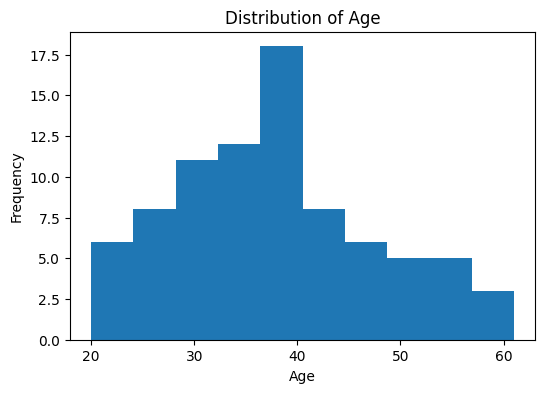

In [20]:
# Histogram for numerical variable 'age'
plt.figure(figsize=(6, 4))
df['age'].plot(kind='hist', bins=10)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

A histogram shows how the ages are distributed, providing insights into the range and frequency of ages in the dataset.

####**2.3.3. Bar chart for categorical variable 'Family'**

<ipython-input-21-4a5e956166f5>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['family'].replace({1: 'Single', 2: 'Married'}, inplace=True)


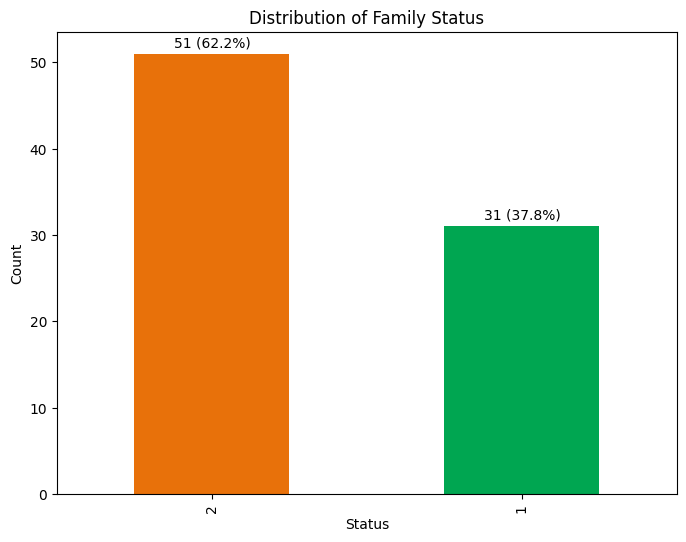

In [21]:
# Bar chart for categorical variable 'Family'
plt.figure(figsize=(8, 6))
ax = df['family'].value_counts().plot(kind='bar', color=['#e8710a', '#00a651'])
df['family'].replace({1: 'Single', 2: 'Married'}, inplace=True)
plt.title('Distribution of Family Status')
plt.xlabel('Status')
plt.ylabel('Count')

# Add value labels on top of the bars
family_counts = df['family'].value_counts()
total = family_counts.sum()  # Calculate total count for percentage calculation
for i, v in enumerate(family_counts.values):
    percentage = (v / total) * 100  # Calculate percentage
    plt.text(i, v + 0.5, f'{v} ({percentage:.1f}%)', ha='center', va='bottom')

plt.show()

####**2.3.4. Histogram for numerical variable 'Years of Service'**

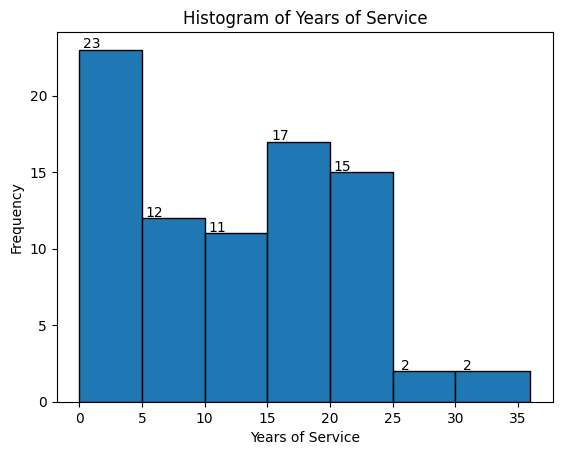

In [22]:
# Histogram of numerical variable 'Years of Service'
df_6 = df['years_of_service']
df_6.fillna(0, inplace=True)
bin = [0, 5, 10, 15, 20, 25, 30, 36]
plt.hist(df_6, bins=bin, edgecolor='black')
plt.xlabel('Years of Service')
plt.ylabel('Frequency')
plt.title('Histogram of Years of Service')

counts, edges = np.histogram(df_6, bins=bin)
for count, edge in zip(counts, edges[:-1]):
    plt.text(edge + 1, count + 0.1, str(count), ha='center')

plt.show()

####**2.3.5. Box plots for numerical variable 'Salary'**

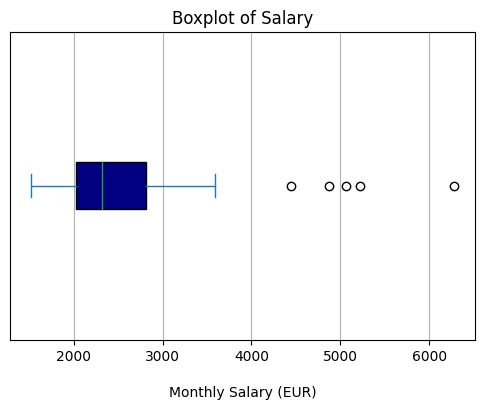

In [23]:
# Horizontal boxplots for numerical variable 'Salary'
plt.figure(figsize=(6, 4))
df['salary'].plot(kind='box', vert=False, patch_artist=True,
            boxprops=dict(facecolor='navy', color='black'))

plt.title('Boxplot of Salary')
plt.xlabel('\nMonthly Salary (EUR)')
plt.yticks([])
plt.grid()
plt.show()

####**2.3.6. Pie chart for categorical variable 'Sat_management'**

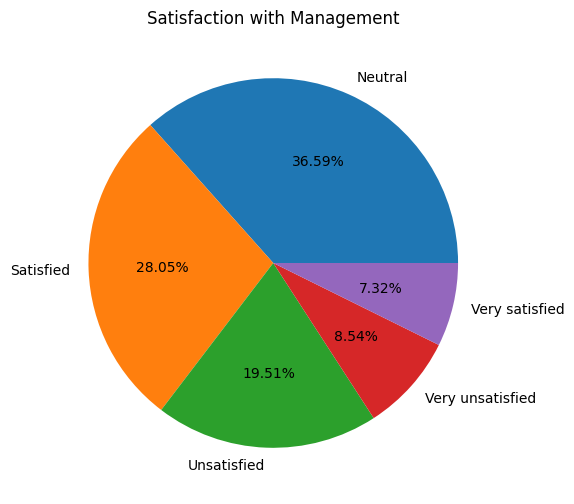

In [24]:
# Piechart for categorical variable 'sat_management'
df_2 = df['sat_management'].replace({1:'Very unsatisfied', 2:'Unsatisfied', 3:'Neutral', 4:'Satisfied', 5:'Very satisfied'})

plt.figure(figsize=(6, 6))
df_2.value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title('Satisfaction with Management')
plt.ylabel('')
plt.show()

We replace numerical satisfaction levels with meaningful labels and create a pie chart to show the percentage of satisfaction levels.

####**2.3.7. Scatter plot for variable 'Age' & 'Salary'**

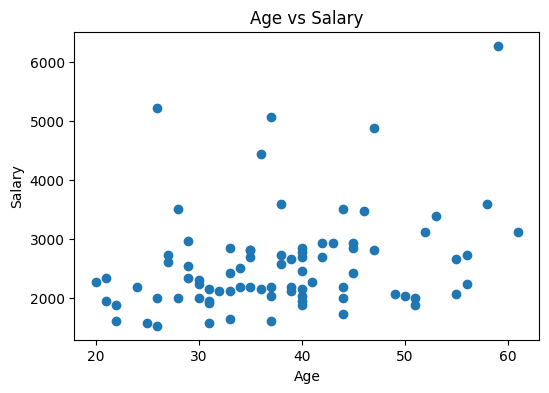

In [25]:
# Scatter plot to check relationships (e.g., age vs salary)
plt.figure(figsize=(6, 4))
plt.scatter(df['age'], df['salary'])
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

This visualization helps confirm that salary might not increase consistently with age, and other factors (like years of service, education, or job role) may play a significant role in determining salary.

# 3. Categorical Variable
* Use crosstab for frequency and percentage distributions.
  - Example: pd.crosstab(df['education'], 'Count')
  - Calculate percentages manually if necessary.
  - Consider creating a named index for rows, and visualize distributions (e.g., bar charts).
  - Always show the number of observations in tables/graphs.

###**3.1. Create a frequency table for 'Education'**

In [26]:
# Create frequency table for education category with count
df1=pd.crosstab(df['education'], 'Count')

In [27]:
#Remove the column with null name
df1.columns.name=''
df1

,Count
education,
1.0,27
2.0,30
3.0,22
4.0,2


In [28]:
# Labeling the index with meaningful education categories
df1.index=['Primary school','Secondary school','Bachelor level','Master level']
df1

,Count
Primary school,27
Secondary school,30
Bachelor level,22
Master level,2


###**3.2. Calculate percentages and add column '%' for 'Education'**

In [29]:
#Calculate percentages and add column '%'

df1['%'] = df1['Count'] / df1['Count'].sum() * 100  # Calculate percentages
df1['%'] = df1['%'].round(2)                        # Round to 2 decimal places

df1

,Count,%
Primary school,27,33.33
Secondary school,30,37.04
Bachelor level,22,27.16
Master level,2,2.47


###**3.3. Visualize 'Education' using bar chart**

In [30]:
# Create new dataframe for education distribution by percentage
df_3 = pd.crosstab(df['education'], 'Count', normalize='columns') * 100
df_3 = df_3.reset_index()

In [31]:
# Convert education value name
df_3.index=['Primary school','Secondary school','Bachelor level','Master level']
df_3

col_0,education,Count
Primary school,1.0,33.333333
Secondary school,2.0,37.037037
Bachelor level,3.0,27.160494
Master level,4.0,2.469136


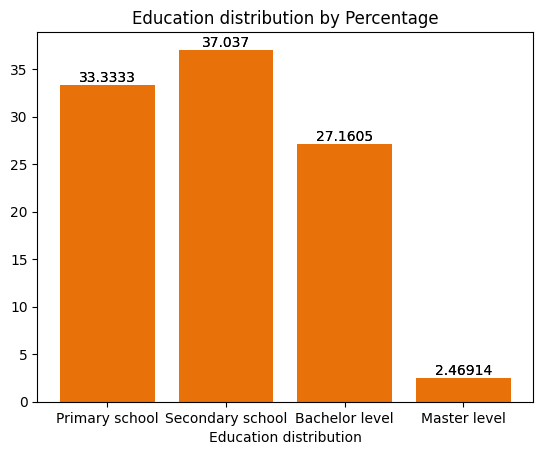

In [32]:
# Visualize education using bar chart
fig,ax=plt.subplots()
chart = plt.bar(df_3.index, df_3['Count'], color='#e8710a')
ax.bar_label(chart, label_type='edge')

# Annotate each bar with its value
ax.bar_label(chart, label_type='edge')
plt.title('Education distribution by Percentage')
plt.xlabel('Education distribution')
#plt.grid(axis='y')
plt.show()

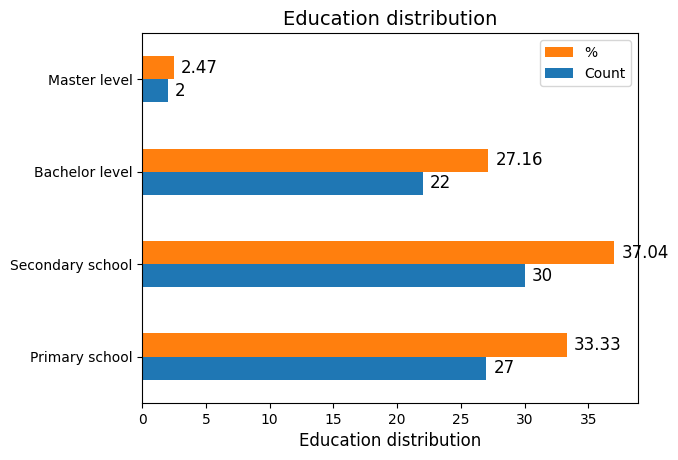

In [33]:
# Visualize education by counts & percentage
fig, ax = plt.subplots()
df4 = df1.plot.barh(ax=ax,legend='reverse')
# Add labels to the bars
for container in df4.containers:
    df4.bar_label(container, fontsize=12, label_type='edge', padding=5)
plt.title('Education distribution', fontsize=14)


plt.xlabel('Education distribution', fontsize=12)
plt.ylabel('')

# Add grid lines along the y-axis
#plt.grid(axis='y')

# Show the plot
plt.show()


# 4. Numerical Variable
* Start with a quantitative variable (e.g., age).
  - Check min and max values using describe().
  - Define bins for classification.
    - Start by using the default settings of hist() to observe data distribution.
    - Bins don’t have to be evenly spaced.
  - Classify original values into a new categorical variable for analysis. Visualize this with a histogram (not a bar chart).
  - Calculate frequency and percentage distributions for the new classified variable as needed.

###**4.1. Check minimum and maximum values of 'Salary'**

In [34]:
# Check min and max salary using describe()
df['salary'].describe()

,salary
count,82.000000
mean,2563.878049
std,849.350302
min,1521.000000
25%,2027.000000
50%,2320.000000
75%,2808.000000
max,6278.000000


In [35]:
print("Minimum salary:", min(df['salary']))
print("Maximum salary:", max(df['salary']))

Minimum salary: 1521
Maximum salary: 6278


###**4.2. Define bins for 'Salary'**
Let's start by using the default settings of hist() to observe data distribution of salary.

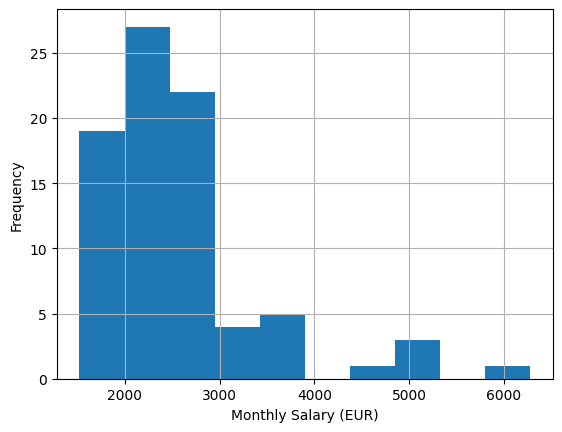

In [36]:
# Observe data distribution of salary by using hist()
df['salary'].hist()
plt.xlabel('Monthly Salary (EUR)')
plt.ylabel('Frequency')
plt.show()

Based on the observed distribution, we classify original 'salary' values into bins and create a new categorical variable 'salary_bins' as following:

In [37]:
bins = [1000, 2000, 3000, 4000, 5000, max(df['salary'])]

In [38]:
# Create new categorical variable 'salary_bins' & view the first 5 rows
df['salary_bins'] = pd.cut(df['salary'], bins=bins)
df[['salary', 'salary_bins']].head()

,salary,salary_bins
0,3587,"(3000, 4000]"
1,2963,"(2000, 3000]"
2,1989,"(1000, 2000]"
3,2144,"(2000, 3000]"
4,2183,"(2000, 3000]"


###**4.3. Create a frequency table for the binned 'Salary'**

In [39]:
# Create a frequency table using pd.crossstab()
df_salary = pd.crosstab(df['salary_bins'], columns='Count')

# Remove the column name
df_salary.columns.name = ''
df_salary

,Count
salary_bins,
"(1000, 2000]",19
"(2000, 3000]",50
"(3000, 4000]",8
"(4000, 5000]",2
"(5000, 6278]",3


###**4.4. Calculate percentages and add new row 'Total' into the frequency table**

In [40]:
# Count the total number of respondents & add percentage column
n = df_salary['Count'].sum()
df_salary['%'] = df_salary['Count'] / n * 100

# Round % to 2 decimals
df_salary['%'] = df_salary['%'].round(2)

# Add a new row for 'Total'
df_salary.loc['Total'] = df_salary.sum()

df_salary

,Count,%
salary_bins,,
"(1000, 2000]",19.0,23.17
"(2000, 3000]",50.0,60.98
"(3000, 4000]",8.0,9.76
"(4000, 5000]",2.0,2.44
"(5000, 6278]",3.0,3.66
Total,82.0,100.01


###**4.5. Visualize the binned 'Salary' with Histogram**

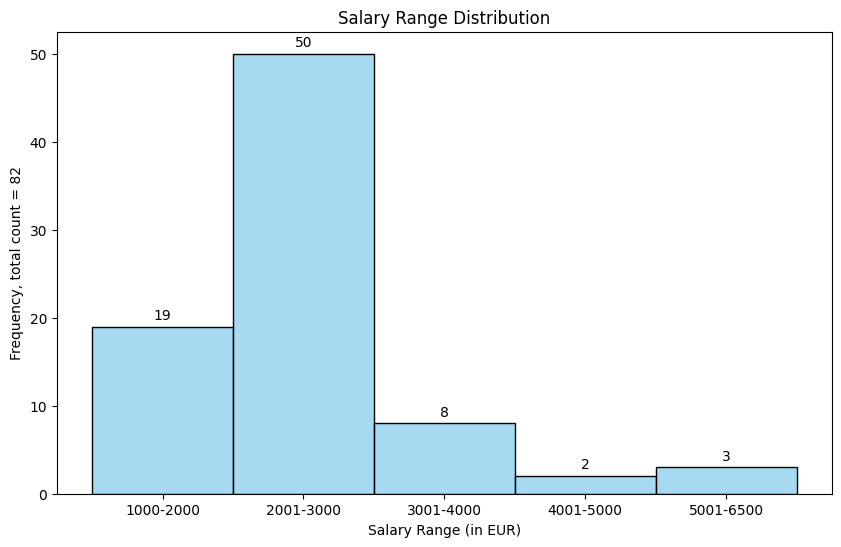

In [41]:
# Add labels for the bins
labels = ['1000-2000', '2001-3000', '3001-4000', '4001-5000', '5001-6500']
df['salary_bins'] = pd.cut(df['salary'], bins=bins, labels=labels)

# Sort the salary bins from lowest to highest
df['salary_bins'] = pd.Categorical(df['salary_bins'], categories=labels, ordered=True)

# Plot the histogram of salary bins
plt.figure(figsize=(10, 6))
chart = sns.histplot(df['salary_bins'], color='skyblue', edgecolor='black', discrete=True)
for p in chart.patches: # Display bins' value on top of each bar
    height = p.get_height()
    chart.text(p.get_x() + p.get_width() / 2, height + 0.5, f'{int(height)}',
        ha='center', va='bottom', fontsize=10)
plt.title('Salary Range Distribution')
plt.xlabel('Salary Range (in EUR)')
plt.ylabel('Frequency, total count = ' + str(n))
plt.show()

# 5. Analyzing Two Variables
* Crosstab to explore relationships between two variables.
  - Example: pd.crosstab(df['education'], df['gender'], normalize='columns') * 100
  - Visualize with bar charts if necessary.
* Carefully review the results—only make cautious, observational statements.

### 5.1. Analyze depedency between 'Education' and 'Gender'

In [42]:
# create a new Df and change the values of column 'education'
df_5 = df[['gender', 'education']]
df_5['education']= df_5['education'].replace({1:'Primary school',2:'Secondary school',3:'Bachelor level', 4:'Master level'})
df_5['education'].unique()

<ipython-input-42-3dfcfdf535e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5['education']= df_5['education'].replace({1:'Primary school',2:'Secondary school',3:'Bachelor level', 4:'Master level'})


array(['Primary school', 'Secondary school', 'Bachelor level',
       'Master level', nan], dtype=object)

In [43]:
# Set ordinal order for education levels
ordinal_order = ['Primary school', 'Secondary school','Bachelor level', 'Master level']
df_5['education'] = df_5['education'].astype(pd.CategoricalDtype(categories=ordinal_order, ordered=True))

<ipython-input-43-9f217918f355>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5['education'] = df_5['education'].astype(pd.CategoricalDtype(categories=ordinal_order, ordered=True))


#### 5.1.1. Create a crosstab

In [44]:
# Crosstab for education distribution by gender
df_5_1 = pd.crosstab(df_5['education'], df_5['gender'], normalize='columns') * 100
df_5_1.reset_index(inplace=True)
df_5_1 = df_5_1.round(2)
df_5_1

gender,education,Man,Woman
0,Primary school,26.32,35.48
1,Secondary school,36.84,37.10
2,Bachelor level,36.84,24.19
3,Master level,0.00,3.23


In [45]:
df_5_1_2 = pd.crosstab(df_5['gender'], df_5['education'], normalize='columns') * 100
df_5_1_2.columns=['Primary school','Secondary school','Bachelor level','Master level']
df_5_1_2.index=['Man','Woman']
df_5_1_2 = df_5_1_2.round(2)
df_5_1_2

,Primary school,Secondary school,Bachelor level,Master level
Man,18.52,23.33,31.82,0.0
Woman,81.48,76.67,68.18,100.0


#### 5.1.2. Visualize with bar charts

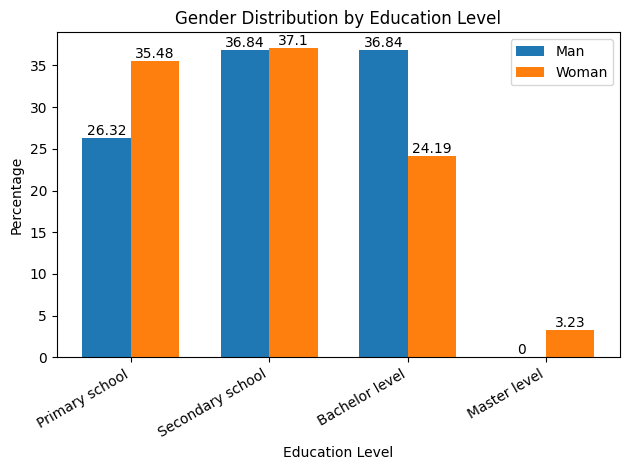

In [46]:
# Plotting
bar_width = 0.35
index = np.arange(len(df_5_1['education']))

fig, ax = plt.subplots()

# Creating bars for 'man' and 'woman'
bars1 = ax.bar(index, df_5_1['Man'], bar_width, label='Man')
bars2 = ax.bar(index + bar_width, df_5_1['Woman'], bar_width, label='Woman')
ax.bar_label(bars1)
ax.bar_label(bars2)
# Adding labels, title, and formatting
ax.set_xlabel('Education Level')
ax.set_ylabel('Percentage')
ax.set_title('Gender Distribution by Education Level')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df_5_1['education'], rotation=30, ha='right')
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

#### 5.1.3. Perform Chi-Square test

In [47]:
# Define a function to perform the Chi-Square Test
def chi_square_test(data):

  # Performing the Chi-Square Test
  chi2, p, dof, expected = chi2_contingency(data)
  # Interpreting the result
  significant = p < 0.05  # 5% significance level
  return chi2, p.round(3), significant


In [48]:
data = pd.crosstab(df_5['education'], df_5['gender'], normalize='columns') * 100

In [49]:
chi2, p, significant = chi_square_test(data)
print("Chi-square test:", chi2)
print("p-Value: ", p)
print("Significant: ", significant)

Chi-square test: 7.2079727301532035
p-Value:  0.066
Significant:  False


#### 5.1.4. Interpret the results
The p-value of 0.065 > 0.05, indicating that, with the values of the dataframe, the observed differences in gender distribution across education levels are not statistically significant. This suggests that any variation in gender across education levels is likely due to random chance, rather than a meaningful association. Therefore, we fail to reject the null hypothesis, and there is no evidence to support a relationship between gender and education level in this dataset




### 5.2. Analyze dependency between 'Salary' and 'Years of Service'

#### 5.2.1. Create a crosstab

In [50]:
df_5_3 = df[['salary', 'years_of_service']]
bins = [0, 5, 10, 15, 20, 25, 30, 36]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-36']
df_5_3['years_of_service'] = pd.cut(df_5_3['years_of_service'], bins=bins, labels=labels, right=False)
df_5_4 = pd.crosstab(df_5_3['salary'], df_5_3['years_of_service'], normalize='columns') * 100
df_5_4.fillna(0, inplace=True)
df_5_4.reset_index(inplace=True)
df_5_4.set_index('salary', inplace=True)
df_5_4.columns.name = 'Year of service'
df_5_4.head()

<ipython-input-50-a6a432d5cfbe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5_3['years_of_service'] = pd.cut(df_5_3['years_of_service'], bins=bins, labels=labels, right=False)


Year of service,0-5,5-10,10-15,15-20,20-25,25-30,30-36
salary,,,,,,,
1521,4.347826,0.0,0.0,0.000000,0.0,0.0,0.0
1559,8.695652,0.0,0.0,0.000000,0.0,0.0,0.0
1598,4.347826,0.0,0.0,5.882353,0.0,0.0,0.0
1638,4.347826,0.0,0.0,0.000000,0.0,0.0,0.0
1715,4.347826,0.0,0.0,0.000000,0.0,0.0,0.0


#### 5.2.2. Perform Chi-Square test

In [51]:
chi2, p, significant = chi_square_test(df_5_4)
print("Chi-square Test:", chi2)
print("p-Value: ", p)
print("Significant: ", significant)

Chi-square Test: 2785.760892492146
p-Value:  0.0
Significant:  True


#### 5.2.3. Interpret the results
The p-value = 0.00 < 0.05, we can conclude that there is a statistically significant association between these two variables. This means that this relationship is not due to random chance, and salary levels are likely influenced by years of service.

### 5.3. Analyze depedency between 'Salary' and 'Education'

#### **5.3.1. Create a crosstab**

In [52]:
# Create a crosstab for 'salary' and 'education' by percentage
df_salary_education = pd.crosstab(df['salary_bins'], df['education'], normalize='columns') * 100

# Rename the index and columns
df_salary_education.index = ['1000-2000', '2001-3000', '3001-4000', '4001-5000', '5001-6500']
df_salary_education.columns = ['Primary school', 'Secondary school', 'Bachelor level', 'Master level']

df_salary_education

,Primary school,Secondary school,Bachelor level,Master level
1000-2000,25.925926,26.666667,13.636364,0.0
2001-3000,66.666667,60.000000,63.636364,0.0
3001-4000,7.407407,13.333333,9.090909,0.0
4001-5000,0.000000,0.000000,9.090909,0.0
5001-6500,0.000000,0.000000,4.545455,100.0


#### 5.3.2. Visualize with bar charts

Now we create a horizontal bar chart to visualize the percentage distribution of salary range across education levels. This provides a clear visual comparison between each salary range in different education categories.

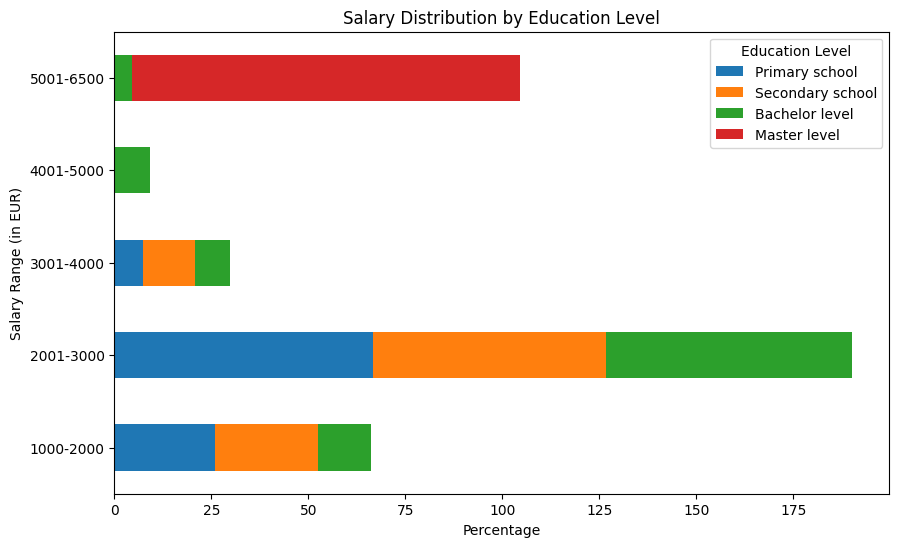

In [53]:
# Create a bar chart for salary and education
df_salary_education.plot.barh(stacked=True, figsize=(10, 6))
plt.title('Salary Distribution by Education Level')
plt.xlabel('Percentage')
plt.ylabel('Salary Range (in EUR)')
plt.legend(title='Education Level', bbox_to_anchor=(1, 1))
plt.show()

#### 5.3.3. Perform Chi-Square test

In [54]:
chi2, p, significant = chi_square_test(df_salary_education)
print("Chi-square test:", chi2)
print("p-Value: ", p)
print("Significant: ", significant)

Chi-square test: 411.0199539061807
p-Value:  0.0
Significant:  True


#### 5.3.4. Interpret the results
By observing the Chi-square test with a p-value of 0.0, we may state that there is a strong dependency between salary and education level.
Besides, according to the frequency table, respondents with a Master degree tend to be in the highest salary range (5001-6500 euros), while those with Primary school education are mainly concentrated in the lower salary ranges (1000-3000 euros).
This highlights the important role of education in career advancement within the company, with higher degrees resulting in greater salary opportunities.